# Data Generation

Create a script that generates random data from different distributions. Compare: (a) a normal or Gaussian distribution for different values of the variance and mean, (b) a uniformly random distribution, (c) the beta distribution. 

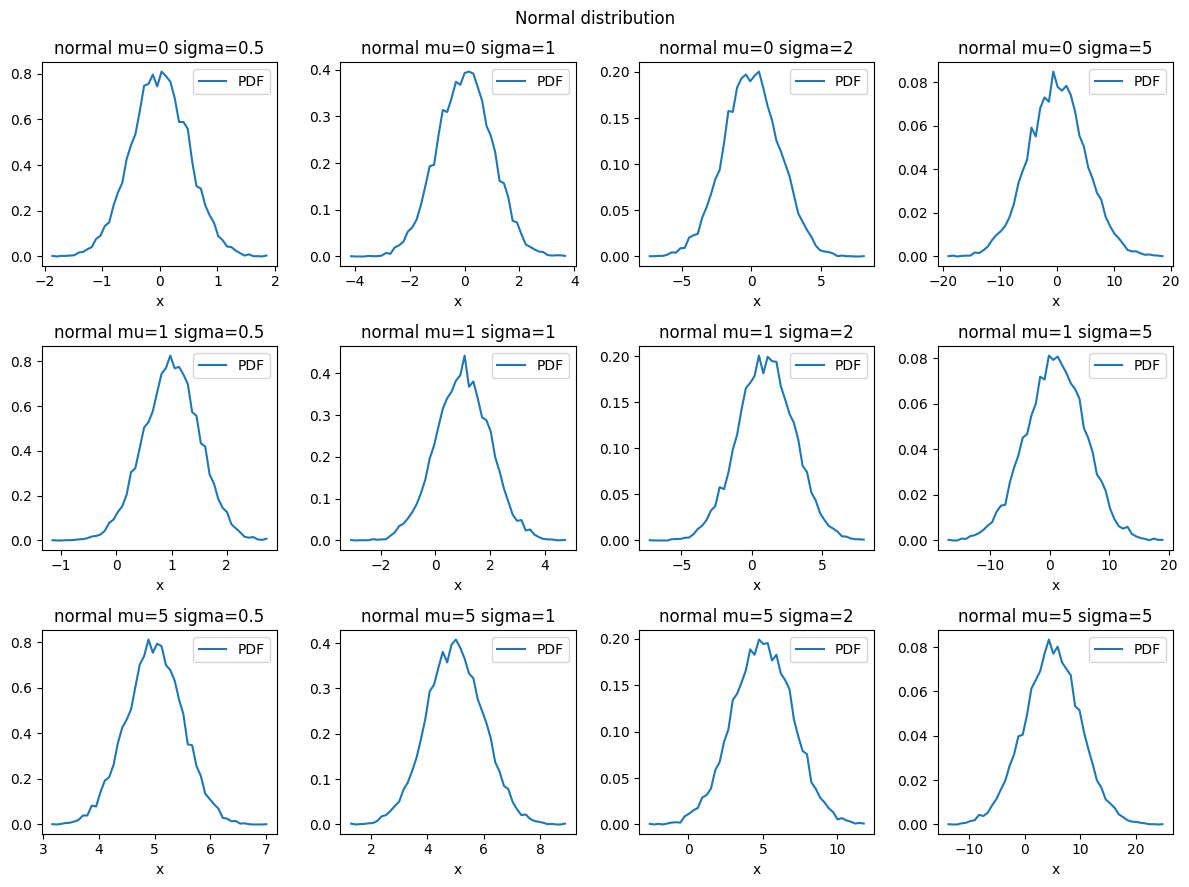

In [27]:
# Generate the data required by problems 1, 2 and 3
# Ouput is a csv file with one column for each combination of distribution and corresponding variations

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# General parameters

N = 10000                # Number of samples
Seed = 100013059        # Seed for reproducibility
output_file_path = f"./data_{N}_{Seed}.csv"
plot = True

rng = np.random.default_rng(seed=Seed)
df = pd.DataFrame()
df.index.name = "sample"

# Normal/Gaussian distribution

normal_mean_values = [0, 1, 5]
normal_sigma_values = [0.5, 1, 2, 5]
for mu in normal_mean_values:
    for sigma in normal_sigma_values:
        df[f"normal mu={mu} sigma={sigma}"] = rng.normal(mu, sigma, size=N)
       
# Uniformly random distribution


# Beta distribution

df.to_csv(output_file_path)

if plot:
    fig, axes = plt.subplots(len(normal_mean_values), len(normal_sigma_values), figsize=(12, 9))
    fig.suptitle("Normal distribution")
    for i in range(len(normal_mean_values)):
        for j in  range(len(normal_sigma_values)):
            index = i*len(normal_sigma_values) + j
            data = df[df.columns[index]]
            title = df.columns[index]
            ax = axes[i, j]
            ax.set_title(title)
            ax.set_xlabel("x")
            counts, bin_edges = np.histogram(data, bins=50, density=True)
            x = (bin_edges[:-1] + bin_edges[1:]) / 2
            ax.plot(x,counts,label="PDF")
            ax.legend()
    plt.tight_layout()
    plt.show()